In [1]:
## . . Import the plotting and libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import *

## . . Example utility file included with the class notes
## . . You probably will need to copy over to the local working directory
## . . or make an addition to the path variable
import io_utilities as ioutil

<h1><center>LAB 1 - 1D Interpolation</center></h1>


## DUE: 28 August 2019 @ 11.59pm

## NAME: $\hspace{2.5in}$                                 STUDENT NUMBER: 

The purpose of this lab is to get you thinking about the mechanics of 1D interpolation, which should assist in developing a deeper understanding of just what interpolation is doing in 1D and in higher dimensions, when (and when not!) to trust interpolation results, and how to implement it beyond using canned Python routines. These skills could be very important for when you are developing your own code base!

In this course we're going to promote the use of better coding practice. In particular, we would like to encourage code reusability (e.g., writing functions rather than repeat coding block) as well as developing your own python modules.  For the latter see the *io_utilities.py* file and its use in the 02_Interpolation.ipynb file.

## Part 1 - Point-wise Cubic 1D Lagrangian Interpolation

**Q1-1**: Write a **point-wise cubic** (i.e., N=3) 1D Lagrangian interpolation **function** that inputs:
   * $n+1$ data points of $(x_i,f(x_i))$; and
   * a set of output points $y_i$ at which to calculate $g(y_i)$.

and then outputs:
   * the interpolated values $(y_i,g(y_i))$.  
  
Make sure to think about how to handle the end points.  

**To emphasize code reuse, put your interpolation function into a separate module file and then import it above for use.** Note: you may want to develop the routine first in the box below, and then save it to a separate file. You may have to use the *Restart & Run All* option under the Kernal tab above in order to affect any changes you make in the module file.  

In [2]:
## . . Your answer to Q1-1 goes here

**Q1-2**: Validate your point-wise cubic Lagrange interpolation code against a chirp function $f(x) = \sin(x+\sin 1.1x)$ defined between $x\in[0,10\pi]$ where the input values $(x_i,f(x_i))$ are regularly sampled every $\Delta x = \pi/5$ and your output values $(y_i,g(y_i))$ are sampled every $\Delta y = \pi/20$. Compute the interpolation error in $g(y_i)$ against the known analytic $f(x)$.  Include illustrations of the interpolation results and the interpolation error.

In [3]:
## . . Your answer to Q1-2 goes here

**Q1-3**: How does interpolation error in $g(y_i)$ change as a function of the initial $\Delta x$? Describe any trends you observe and give an explanation as to why they occur.

In [4]:
## . . Your answer to Q1-3 goes here

## Part 2 - 1D Cubic Spline Interpolation

You have been given a regularly sampled topography data set acquired across the San Andreas Fault. The section of interest is defined in the *profile* variable in the code snippet below.  The surface expression of the San Andreas Fault in the plot below is found rougly at distance 1.5 km.

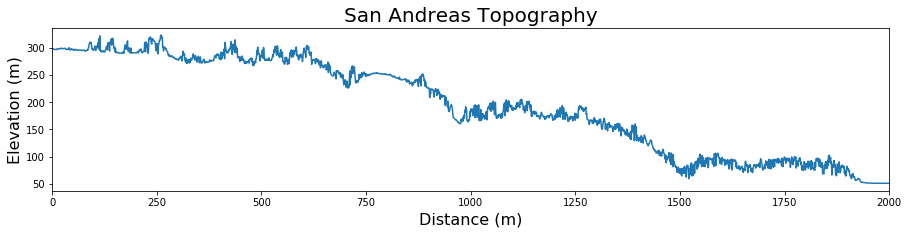

In [5]:
def plot_topo(topo,xlab,ylab,title):
    plt.plot(profile)
    plt.xlim(0,len(profile))
    plt.xlabel(xlab,fontsize=16)
    plt.ylabel(ylab,fontsize=16)
    plt.title(title,fontsize=20)
    plt.show()  

# . . Read in TIN LIDAR topography file
# . . You can use "help(ioutil.Read_In_TIN)" to find out more information
test = ioutil.Read_In_TIN("./data/SanAndreas.tin.asc",False)

# . . Extract profile and plot
profile = test.data[100:2100,60]
plt.figure(figsize=(15,3))
plot_topo(profile,'Distance (m)','Elevation (m)','San Andreas Topography')

Now let's imagine that you only have a random 20% of the 2000 total data points (i.e., we're going to throw away the other 80%). Afte removing these points, your task is to use the *scipy.interpolate.interp1d* function to reconstuct the data points that we just threw away!

**Q2-1**: Write a short script to randomly select (uniquely!) 400 of the 2000 total data points.  Plot these $f(x_j)$ points against their associated $x_j$ locations.

In [6]:
## . . Your answer to Q2-1 goes here

 **Q2-2**: Let's now use the *scipy.interpolate.interp1d* function to perform spline interpolation of the data randomly decimated data set to recover something approximating the original topographic profile in the plot above (i.e., to generate ($y_i,g(y_i)$ where $y_i$ is the original uniformly sampled grid).  Interpolate the topography data using the the follow four different orders of spline interpolation (i.e., change the *kind* parameter): *zero*, *slinear*, *quadratic* and *cubic*.  Include a plot like the one above for each of the four spline options.

In [7]:
## . . Your answer to Q2-2 goes here

**Q2-3**: Comment on the differences you see (or lack there of) in the reconstructed topographic profile.

In [8]:
## . . You answer to Q2-3 goes here

## Part 3 - Regularizating a GPR data set

In East Perth, Australia, there is an interesting historical location where the original European graveyard was abandoned and turned into parking lots ... without removing any of the gravesites. The parking lot was first leveled during construction by dumping clean sand and some larger rocks on top of the original topographic surface (that dipped to the east), and was then paved.

Over the past two years, there has been an archaeological project to restore the site back to the original graveyard. To support this effort, a large ground-penetrating radar survey was completed in order to investigate what could be determined about the subsurface in a non-destructive manner.  Figure 2 below shows the area of investigation including the location of one of the 45m GPR profiles that were acquired.

<img src="images/EAST_PERTH_CEMETARY_GPR1.png" width="750">
** Figure 2. Image of the field site showing the location of one of the profiles acquired during the GPR investigation. East is to the right.**

The GPR data turned up some interesting features, as is shown in the transect illustrated in Figure 3.  The top panel shows the profile, while the bottom panel shows the interpretations overtop of the same profile.

<img src="images/EAST_PERTH_CEMETARY_GPR2.png" width="750">
** Figure 3. GPR data acquired along the transect marked in Figure 2 (top) along with the associated interpretations (bottom).**

Your goal in this question is to take the GPR data that were recorded at **irregular** locations in the horizontal direction and to **regularize the geometry** (i.e., **regularization**) such that data are put on an **regularly sampled** grid.  Note that the time axis is regularly sampled, so you only have regularize the geometry in the horizontal direction; thus, this is a 1D interpolation problem (i.e., the same lateral 1D interpolation at each time sample).  

Your goal is to recreate an image that looks like the upper panel of Figure 3. Here is a bit of information that you will need to do this task
* Number of time samples: $nt=256$
* First time sample: $ot=0.0$ ns
* Time sample interval: $dt=0.2$ ns
* Number of spatial samples: $nx=400$
* First spatial sample: $ox=0$ m
* Total line length: $L=45.35$ m

Let's first read in the data set (GPRDATA.npy) as well as the lateral coordinates where the data were acquired (X_Samples.npy):

In [9]:
GPRDATA=np.load('data/GPRDATA.npy')
X_Samples=np.load('data/X_Samples.npy')

**Q3-1**: Using the arrays loaded above, develop a interpolation routine that takes the irregularly sampled data and turns it into a regularly sampled data set. 

In [10]:
## . . Your answer to Q3-1 goes here

**Q3-2**: Produce a plot of your regularized 2D GPR section that closely resembles the upper panel of Figure 3.

In [11]:
## . . Your answer to Q3-2 goes here

**Q3-3**: Why did you chose this particular interpolation approach? What other approaches could you use to perform this interpolation task?

In [12]:
## . . Your answer to Q3-3 goes here